# Intro to Machine Learning - Lesson 1 Hands On

### Import Libraries

In [32]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [34]:
Diamonds.head

<bound method NDFrame.head of        carat        cut color clarity  depth  table  price     x     y     z
6271    0.71  Very Good     D    VVS2   61.7   58.0   4014  5.71  5.74  3.53
13420   1.20    Premium     I     SI1   61.1   58.0   5510  6.88  6.80  4.18
13158   1.01  Very Good     D     SI1   62.9   59.0   5443  6.39  6.43  4.03
52243   0.80  Very Good     J     VS1   62.7   58.0   2487  5.91  5.95  3.72
27359   1.51    Premium     D     VS1   63.0   52.0  17936  7.37  7.30  4.62
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
24744   2.26  Very Good     H     SI2   63.2   58.0  13095  8.38  8.26  5.26
7138    1.01  Very Good     G     SI2   62.9   56.0   4176  6.36  6.39  4.01
35425   0.32      Ideal     E     VS2   60.8   55.0    900  4.49  4.42  2.71
11200   1.16    Premium     I     VS2   62.2   58.0   4958  6.74  6.67  4.17
4311    0.90  Very Good     H     SI1   61.9   59.0   3595  6.17  6.21  3.83

[53940 rows x 10 columns]>

In [45]:
x = Diamonds[['cut', 'color', 'clarity']]

In [46]:
y = Diamonds['carat']

In [47]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 6271 to 4311
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


In [66]:
Diamonds.iloc[:,1:] = Diamonds.iloc[:,1:].replace({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4, 'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6, 'IF':0, 'VVS1':1, 'VVS2':2, 'VS1':3, 'VS2':4, 'SI1':5, 'SI2':6, 'I1':7})
Diamonds

carat  cut  color  clarity  depth  table  price     x     y     z
6271    0.71    2      0        2   61.7   58.0   4014  5.71  5.74  3.53
13420   1.20    3      5        5   61.1   58.0   5510  6.88  6.80  4.18
13158   1.01    2      0        5   62.9   59.0   5443  6.39  6.43  4.03
52243   0.80    2      6        3   62.7   58.0   2487  5.91  5.95  3.72
27359   1.51    3      0        3   63.0   52.0  17936  7.37  7.30  4.62
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
24744   2.26    2      4        6   63.2   58.0  13095  8.38  8.26  5.26
7138    1.01    2      3        6   62.9   56.0   4176  6.36  6.39  4.01
35425   0.32    4      1        4   60.8   55.0    900  4.49  4.42  2.71
11200   1.16    3      5        4   62.2   58.0   4958  6.74  6.67  4.17
4311    0.90    2      4        5   61.9   59.0   3595  6.17  6.21  3.83

[53940 rows x 10 columns]

### Train Test Split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .5, random_state=101)

In [52]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(26970, 3) (26970,)
(26970, 3) (26970,)


### Create the Linear Regression Model

In [54]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# Interpreting Supervised Machine Learning Model Accuracy

## Examine Predictions

In [55]:
predictions = lm.predict(x_test)
predictions

array([0.81611275, 0.3254959 , 0.89841586, ..., 0.85647909, 0.54349328,
       1.19714593])

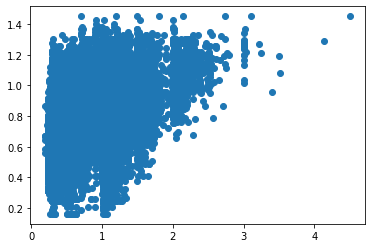

In [57]:
plt.scatter(y_test, predictions)

## Accuracy Score


In [58]:
print("Score:", lm.score(x_test, y_test))

Score: 0.22219864516811227


# Examining Error

## Mean Absolute Error using MAE

In [62]:
metrics.mean_absolute_error(y_test, predictions)

0.3262960900653724

## Mean Squared Error (MSE)

In [63]:
metrics.mean_squared_error(y_test, predictions)

0.17748912368417394

## Root Mean Squared Error (RMSE)

In [64]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.42129458064894915